In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [2]:
import os

class ExtractData():
    def __int__(self, path_to_numpys='Montesinos/'):
        pass
    def convert(self, filelist):
        self.col_names=['datetime', 'periodo', ' None1', 'None2', 'infractions','noice']

        data = np.load(self.path+filelist)
        dataframe = pd.DataFrame(data, columns=self.col_names)
        return dataframe
    
    def run(self):
        self.path = 'Montesinos/'
        self.files = os.listdir(self.path)
        data = []

        for file in self.files:
            dataframe = self.convert(file)
            data.append(dataframe)
        return data



In [131]:
path_to_numpys ='Montesinos/'
worker = ExtractData()

data_frames = worker.run()

In [132]:
data_frames

[                        datetime  periodo  None1 None2 infractions noice
 0     2018-01-30 01:35:59.812279       60      0     0           0     0
 1     2018-01-30 01:36:00.073675       60      0     0           0     0
 2     2018-01-30 01:37:00.141656       60      0     2           0     1
 3     2018-01-30 01:38:00.065506       60      0     1           0     4
 4     2018-01-30 01:39:00.081782       60      1     0           0     0
 5     2018-01-30 01:40:00.151059       60      0     0           0     2
 6     2018-01-30 01:41:00.053641       60      1     0           0     1
 7     2018-01-30 01:42:00.057606       60      2     0           0     0
 8     2018-01-30 01:43:00.054119       60      0     0           0     0
 9     2018-01-30 01:44:00.135329       60      0     0           0     3
 10    2018-01-30 01:45:00.060945       60      3     0           0     1
 11    2018-01-30 01:46:00.146582       60      0     1           0     0
 12    2018-01-30 01:47:00.075861     

In [168]:
df = pd.concat(data_frames)
df = df.drop(['noice','periodo','None2', ' None1'], axis=1)
df.head()


,datetime,infractions
0,2018-01-30 01:35:59.812279,0
1,2018-01-30 01:36:00.073675,0
2,2018-01-30 01:37:00.141656,0
3,2018-01-30 01:38:00.065506,0
4,2018-01-30 01:39:00.081782,0


In [169]:
df.shape

(39296, 2)

In [170]:
from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = df[['infractions']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

df['norm'] = df_normalized
df['MAV100'] = df['norm'].rolling(200).mean()


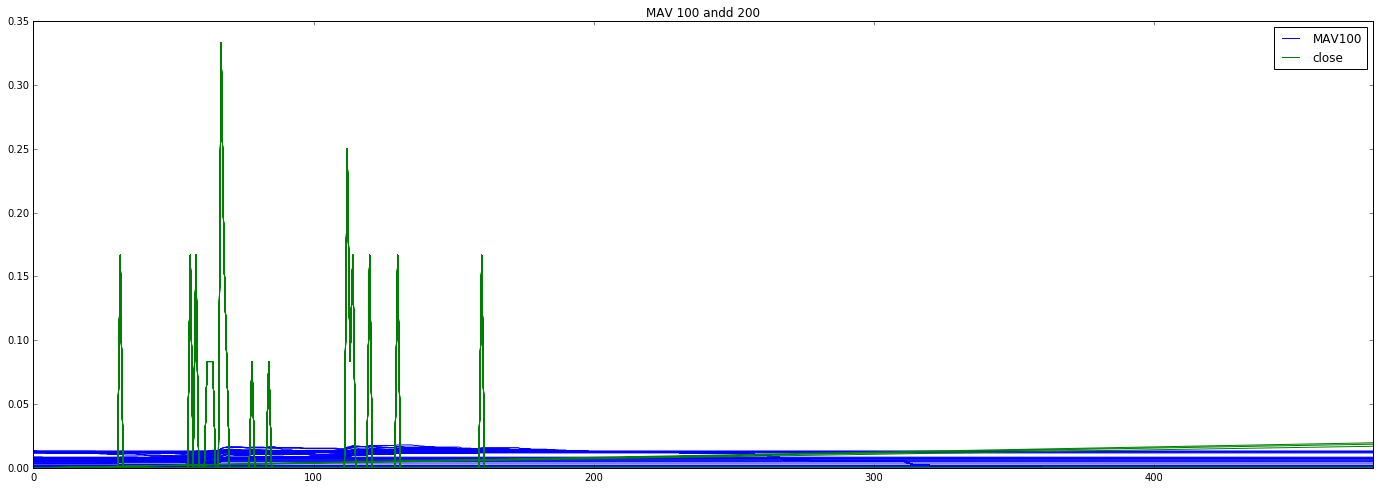

In [171]:
result = pd.DataFrame({'close': df['norm'], 'MAV100': df['MAV100']})
result.plot(title='MAV 100 andd 200')
pyplot.gcf().set_size_inches(24,8)

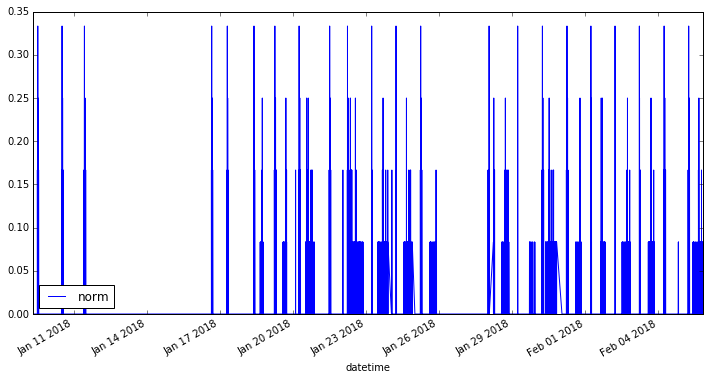

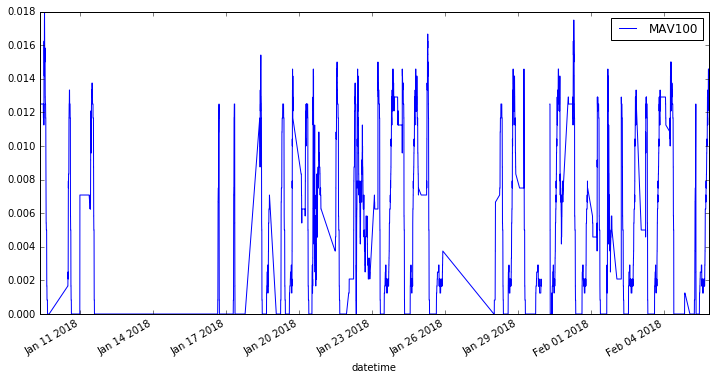

In [172]:
df.plot(x='datetime', y='norm',figsize=(12,6))
df.plot(x='datetime', y='MAV100',figsize=(12,6))

In [174]:
df.head()

,datetime,infractions,norm,MAV100
0,2018-01-30 01:35:59.812279,0,0.0,NaN
1,2018-01-30 01:36:00.073675,0,0.0,NaN
2,2018-01-30 01:37:00.141656,0,0.0,NaN
3,2018-01-30 01:38:00.065506,0,0.0,NaN
4,2018-01-30 01:39:00.081782,0,0.0,NaN


In [39]:
import pandas as pd
import numpy as np
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [40]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

Using TensorFlow backend.


In [41]:
import numpy as np
import math

In [44]:
raw = list(df_n['MAV'].values)
y = np.array(raw)
series = pd.DataFrame(y, columns=['inf'])
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(series.values)
series = pd.DataFrame(scaled)

In [45]:
window_size = 50

series_s = series.copy()
for i in range(window_size):
    series = pd.concat([series, series_s.shift(-(i+1))], axis = 1)
    
series.dropna(axis=0, inplace=True)

In [46]:
series.head()

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,...,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286
1,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,...,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286
2,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,...,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286
3,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,...,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286
4,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,...,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286,-0.994286


In [47]:
series.shape

(39246, 51)

In [48]:
nrow = round(0.8*series.shape[0])

In [49]:
train = series.iloc[:nrow, :]
test = series.iloc[nrow:,:]


In [50]:
from sklearn.utils import shuffle
train = shuffle(train)
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [51]:
train_X = train_X.values
train_y = train_y.values
test_X = test_X.values
test_y = test_y.values

In [55]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(31397, 50, 1)
(31397,)
(7849, 50, 1)
(7849,)


In [56]:
train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)


In [58]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(input_shape = (50,1), output_dim= 50, return_sequences = True))
model.add(Dropout(0.5))
model.add(LSTM(256))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()

/home/stanlee321/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=50, return_sequences=True, input_shape=(50, 1))`
  This is separate from the ipykernel package so we can avoid doing imports until


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               314368    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 325,025
Trainable params: 325,025
Non-trainable params: 0
_________________________________________________________________


In [59]:
start = time.time()
model.fit(train_X,train_y,batch_size=512,epochs=3,validation_split=0.1)
print("> Compilation Time : ", time.time() - start)

/usr/local/lib/python3.5/dist-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 28257 samples, validate on 3140 samples
Epoch 1/3
28257/28257 [==============================] - 14s 513us/step - loss: 0.0471 - val_loss: 0.0018
Epoch 2/3
28257/28257 [==============================] - 13s 463us/step - loss: 0.0071 - val_loss: 7.9601e-04
Epoch 3/3
28257/28257 [==============================] - 13s 462us/step - loss: 0.0059 - val_loss: 8.2055e-04
> Compilation Time :  41.90758013725281


In [60]:
# Doing a prediction on all the test data at once
preds = model.predict(test_X)

In [61]:
preds = scaler.inverse_transform(preds)

In [85]:
actuals = scaler.inverse_transform(test_y.reshape(-1,1))
#actuals = test_y

In [86]:
mean_squared_error(actuals,preds)

2.337623591220119e-05

In [72]:
actuals = (actuals - np.mean(actuals)) / np.std(actuals)

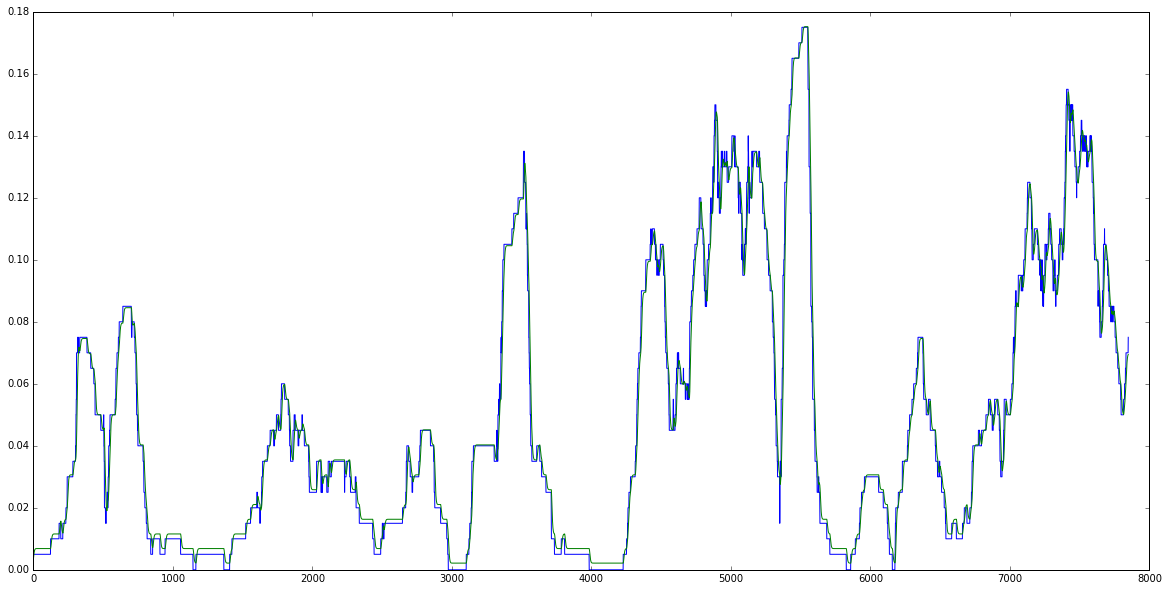

In [88]:
pyplot.figure(figsize=(20,10))
pyplot.plot(actuals)
pyplot.plot(preds)
pyplot.show()

In [98]:
preds2 = model.predict(train_X)

In [99]:
preds2 = scaler.inverse_transform(preds2)

In [106]:
actuals2 = scaler.inverse_transform(train_y.reshape(-1,1))
mean_squared_error(actuals2,preds2)

2.9968498068493816e-05

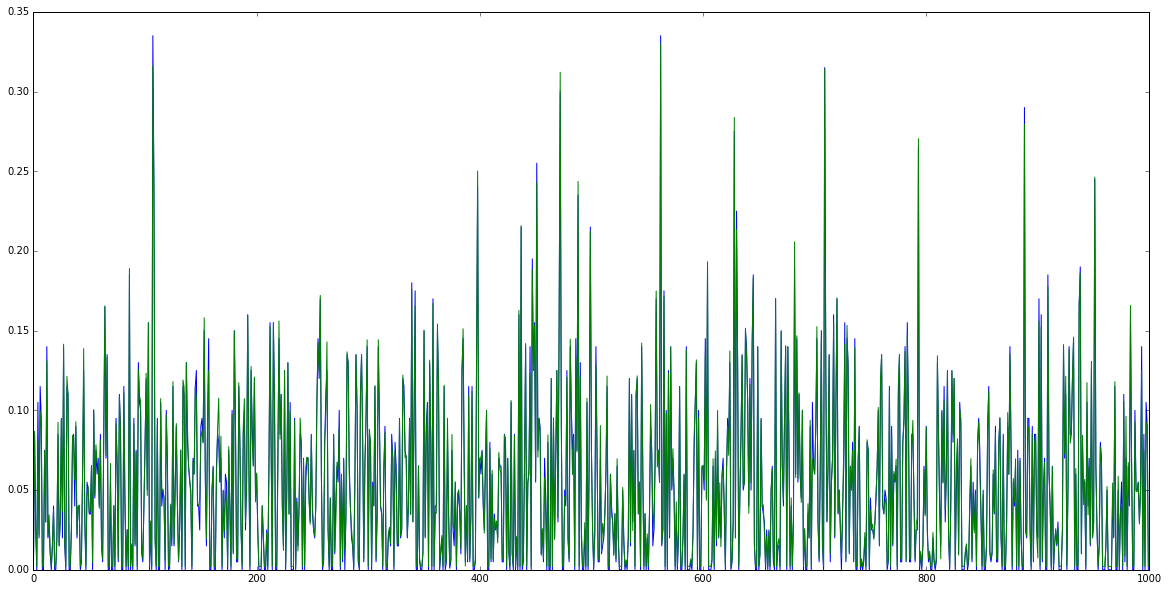

In [108]:
pyplot.figure(figsize=(20,10))
pyplot.plot(actuals2[29000:30000])
pyplot.plot(preds2[29000:30000])
pyplot.show()

In [ ]:
preds_moving = moving_test_window_preds(500)

In [110]:
import numpy as np
from numpy import convolve
import matplotlib.pyplot as plt
 
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma
 
yMA = movingaverage(y,100)
print (yMA)

[0.18 0.18 0.18 ..., 0.060000000000000005 0.060000000000000005
 0.060000000000000005]


In [36]:
def moving_test_window_preds(n_future_preds):

    ''' n_future_preds - Represents the number of future predictions we want to make
                         This coincides with the number of windows that we will move forward
                         on the test data
    '''
    preds_moving = []                                    # Use this to store the prediction made on each test window
    moving_test_window = [test_X[0,:].tolist()]          # Creating the first test window
    moving_test_window = np.array(moving_test_window)    # Making it an numpy array
    
    for i in range(n_future_preds):
        preds_one_step = model.predict(moving_test_window) # Note that this is already a scaled prediction so no need to rescale this
        preds_moving.append(preds_one_step[0,0]) # get the value from the numpy 2D array and append to predictions
        preds_one_step = preds_one_step.reshape(1,1,1) # Reshaping the prediction to 3D array for concatenation with moving test window
        moving_test_window = np.concatenate((moving_test_window[:,1:,:], preds_one_step), axis=1) # This is the new moving test window, where the first element from the window has been removed and the prediction  has been appended to the end
        
    preds_moving = scaler.inverse_transform(preds_moving)
    
    return preds_moving
